# 1.1: Sample space

In [4]:
import itertools as it
import pandas as pd
import numpy as np


sample_space = (1,2,3,4,5,6)

event = [ x for x in sample_space if x % 2 ==0]

prob = len(event)/len(sample_space)

print(f"The probability of drawing a par number is {prob}")

The probability of drawing a par number is 0.5


# 1.2: Conditional probability

In [37]:
###                           (die 1, die 2)
pairs = list(it.product(range(1, 9), repeat=2))


event_sum_8 = [(x, y) for x, y in pairs if x + y == 8]

# condicional: at least a die is bigger than 4
condition = [(x, y) for x, y in pairs if x > 4 or y > 4]

# Cond. Prob.
conditional_event = [pair for pair in event_sum_8 if pair in condition]
probability_conditional = len(conditional_event) / len(condition)
print(f"The conditional probability is: {probability_conditional}")


The conditional probability is: 0.125


## Addicional example: amortising a loan:

In [58]:
update = lambda balance, payment: round(balance *1.1) - payment

print("The Reminder capital:")

list(it.accumulate(it.repeat(90,10), update, initial = 1000))

The Reminder capital:


[1000, 1010, 1021, 1033, 1046, 1061, 1077, 1095, 1114, 1135, 1158]

# 2: Defining a random variable

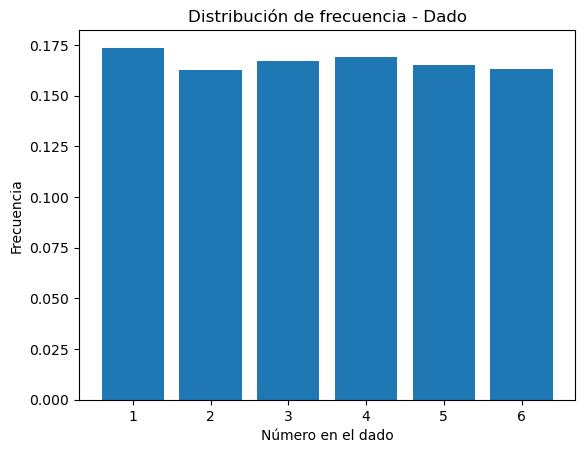

In [72]:
import random
import matplotlib.pyplot as plt

# Simulación
trials = 10000
dice_rolls = [random.randint(1, 6) for _ in range(trials)]

# Frecuencia
frequency = {i: dice_rolls.count(i) / trials for i in range(1, 7)}

# Gráfica
plt.bar(frequency.keys(), frequency.values())
plt.xlabel('Número en el dado')
plt.ylabel('Frecuencia')
plt.title('Distribución de frecuencia - Dado')
plt.show()


# 2.2 Computing variance and expected value

In [1]:
import numpy as np

#R.v.: Roll a die
X = np.array([1, 2, 3, 4, 5, 6])
prob = np.array([1/6] * 6)

# Moments:
expected_value = np.sum(X * prob)
variance = np.sum((X - expected_value)**2 * prob) # Basically the integral

print(f"Expected value: {expected_value}")
print(f"Variance: {variance}")


Expected value: 3.5
Variance: 2.9166666666666665


# 3 Bernoulli

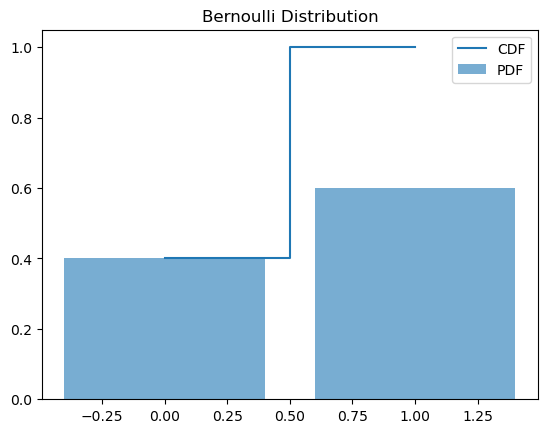

Momentos: Expectation = 0.6 , Variance = 0.24


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli


p = 0.6

# PDF y CDF
x = [0, 1]
pdf = bernoulli.pmf(x, p)
cdf = bernoulli.cdf(x, p)


mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')

plt.bar(x, pdf, alpha=0.6, label="PDF")
plt.step(x, cdf, where='mid', label="CDF")
plt.title("Bernoulli Distribution")
plt.legend()
plt.show()


print("Momentos: Expectation =", mean, ", Variance =", var)


# Binomial

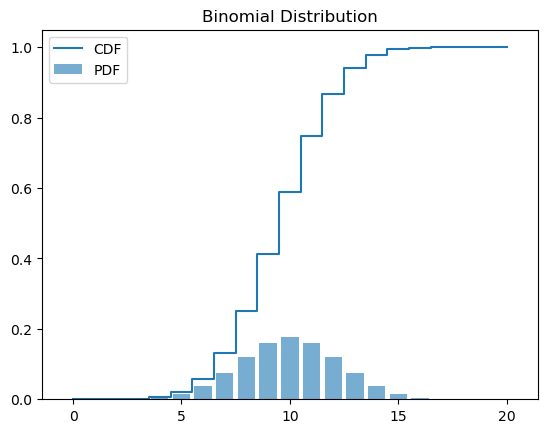

Inversas: [ 8. 10. 12.]
Momentos: Media = 10.0 , Varianza = 5.0


In [4]:
from scipy.stats import binom
n, p = 20, 0.5

# PDF, CDF
x = np.arange(0, n+1)
pdf = binom.pmf(x, n, p)
cdf = binom.cdf(x, n, p)


mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')


plt.bar(x, pdf, alpha=0.6, label="PDF")
plt.step(x, cdf, where='mid', label="CDF")
plt.title("Binomial Distribution")
plt.legend()
plt.show()


percentiles = [0.25, 0.5, 0.75]
inversas = binom.ppf(percentiles, n, p)
print("Inversas:", inversas)
print("Moments: Media =", mean, ", Varianza =", var)


# Poisson

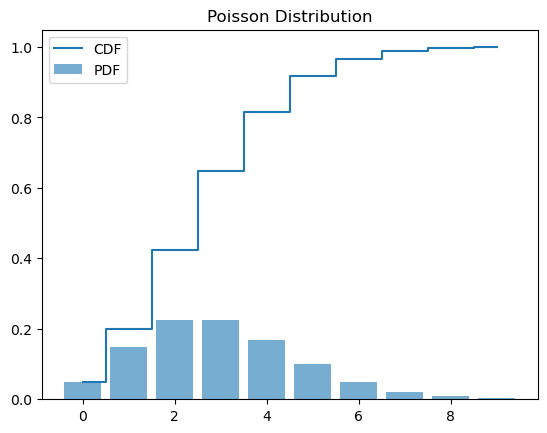

Inversas: [2. 3. 4.]
Moments: Expectation = 3.0 , Variance = 3.0


In [7]:
from scipy.stats import poisson

# Parámetro (lambda)
mu = 3

# PDF y CDF
x = np.arange(0, 10)
pdf = poisson.pmf(x, mu)
cdf = poisson.cdf(x, mu)

# Momentos
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

# Graficar PDF y CDF
plt.bar(x, pdf, alpha=0.6, label="PDF")
plt.step(x, cdf, where='mid', label="CDF")
plt.title("Poisson Distribution")
plt.legend()
plt.show()

# Inversa
percentiles = [0.25, 0.5, 0.75]
inversas = poisson.ppf(percentiles, mu)
print("Inversas:", inversas)
print("Moments: Expectation =", mean, ", Variance =", var)


# Uniform

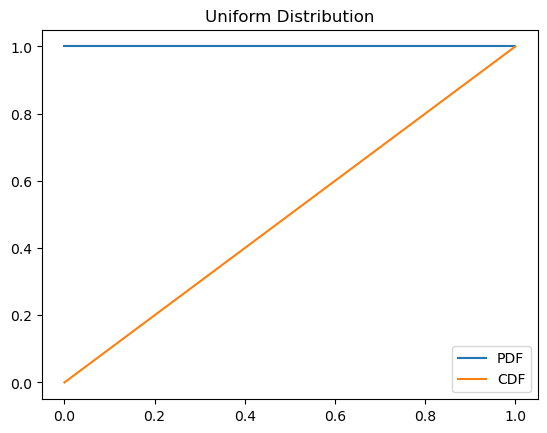

Inversas: [0.25 0.5  0.75]
Moments: Expectation = 0.5 , Variance = 0.08333333333333333


In [6]:
from scipy.stats import uniform


a, b = 0, 1  # Intervalo [a, b]


x = np.linspace(a, b, 100)
pdf = uniform.pdf(x, a, b-a)
cdf = uniform.cdf(x, a, b-a)

mean, var, skew, kurt = uniform.stats(a, b-a, moments='mvsk')


plt.plot(x, pdf, label="PDF")
plt.plot(x, cdf, label="CDF")
plt.title("Uniform Distribution")
plt.legend()
plt.show()


percentiles = [0.25, 0.5, 0.75]
inversas = uniform.ppf(percentiles, a, b-a)
print("Inversas:", inversas)
print("Moments: Expectation =", mean, ", Variance =", var)


# Normal

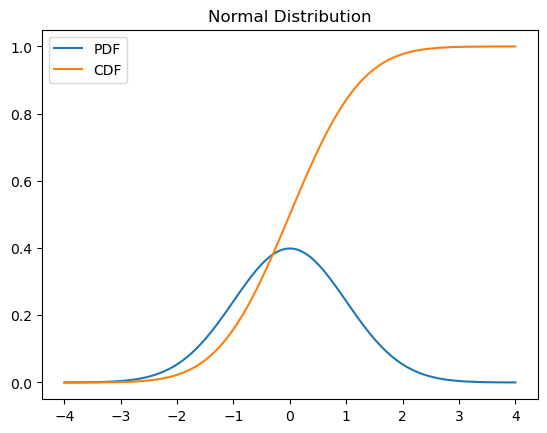

Inversas: [-0.67448975  0.          0.67448975]
Moments: Expectation = 0.0 , Variance = 1.0


In [8]:
from scipy.stats import norm

mu, sigma = 0, 1


x = np.linspace(-4, 4, 100)
pdf = norm.pdf(x, mu, sigma)
cdf = norm.cdf(x, mu, sigma)


mean, var, skew, kurt = norm.stats(mu, sigma, moments='mvsk')


plt.plot(x, pdf, label="PDF")
plt.plot(x, cdf, label="CDF")
plt.title("Normal Distribution")
plt.legend()
plt.show()

percentiles = [0.25, 0.5, 0.75]
inversas = norm.ppf(percentiles, mu, sigma)
print("Inversas:", inversas)
print("Moments: Expectation =", mean, ", Variance =", var)


# Log-Normal

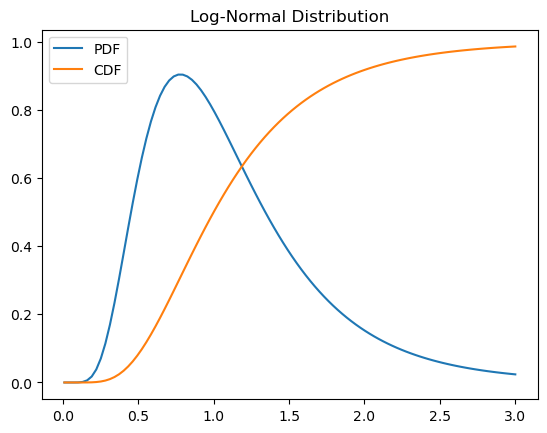

Inversas: [0.71373404 1.         1.40108211]
Moments: Expectation = 1.1331484530668263 , Variance = 0.3646958540123865


In [9]:
from scipy.stats import lognorm


sigma, scale = 0.5, np.exp(0)  # e^(mu)=1 if mu=0


x = np.linspace(0.01, 3, 100)
pdf = lognorm.pdf(x, sigma, scale=scale)
cdf = lognorm.cdf(x, sigma, scale=scale)


mean, var, skew, kurt = lognorm.stats(sigma, scale=scale, moments='mvsk')


plt.plot(x, pdf, label="PDF")
plt.plot(x, cdf, label="CDF")
plt.title("Log-Normal Distribution")
plt.legend()
plt.show()


percentiles = [0.25, 0.5, 0.75]
inversas = lognorm.ppf(percentiles, sigma, scale=scale)
print("Inversas:", inversas)
print("Moments: Expectation =", mean, ", Variance =", var)


# Beta

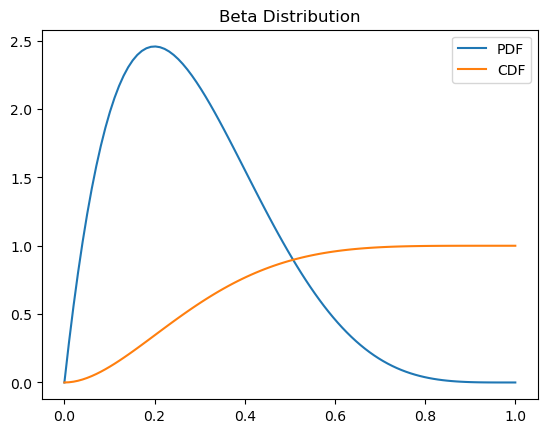

Inversas (percentiles): [0.16116292 0.26444998 0.38947949]
Moments: Expectation = 0.2857142857142857 , Variance = 0.025510204081632654


In [10]:
from scipy.stats import beta

alpha, beta_param = 2, 5

x = np.linspace(0, 1, 100)
pdf = beta.pdf(x, alpha, beta_param)
cdf = beta.cdf(x, alpha, beta_param)

mean, var, skew, kurt = beta.stats(alpha, beta_param, moments='mvsk')


plt.plot(x, pdf, label="PDF")
plt.plot(x, cdf, label="CDF")
plt.title("Beta Distribution")
plt.legend()
plt.show()


percentiles = [0.25, 0.5, 0.75]
inversas = beta.ppf(percentiles, alpha, beta_param)
print("Inversas (percentiles):", inversas)
print("Moments: Expectation =", mean, ", Variance =", var)


# Exponential

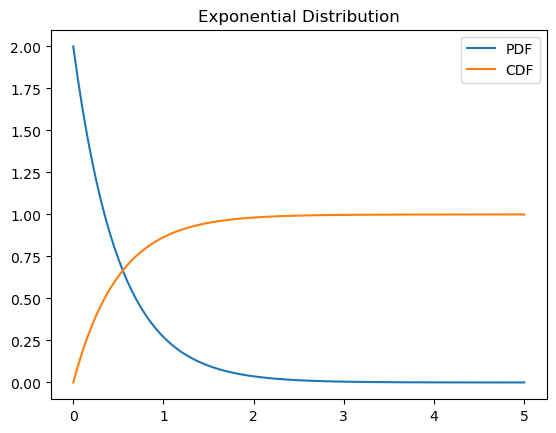

Inversas (percentiles): [0.14384104 0.34657359 0.69314718]
Moments: Expectation = 0.5 , Variance = 0.25


In [11]:
from scipy.stats import expon

# (lambda inverso)
scale = 1 / 2  # Lambda = 2


x = np.linspace(0, 5, 100)
pdf = expon.pdf(x, scale=scale)
cdf = expon.cdf(x, scale=scale)


mean, var, skew, kurt = expon.stats(scale=scale, moments='mvsk')

plt.plot(x, pdf, label="PDF")
plt.plot(x, cdf, label="CDF")
plt.title("Exponential Distribution")
plt.legend()
plt.show()


percentiles = [0.25, 0.5, 0.75]
inversas = expon.ppf(percentiles, scale=scale)
print("Inversas (percentiles):", inversas)
print("Moments: Expectation =", mean, ", Variance =", var)


# Mixture (exponential and beta)

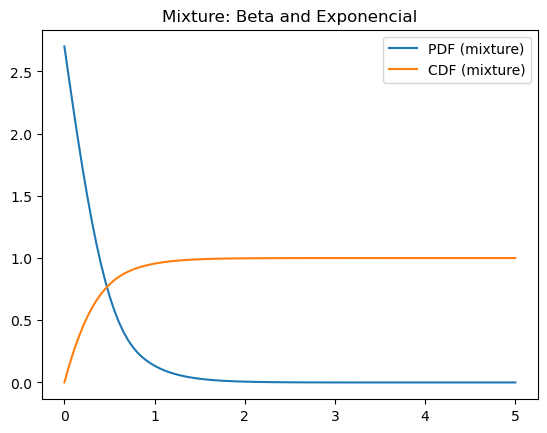

Moments: Expectation = 0.32857142857142857 , Variance = 0.1027551020408163


In [14]:
# Mixtura made up of Beta and Exponencial
from scipy.integrate import quad
from scipy.stats import beta
from scipy.stats import expon
import matplotlib.pyplot as plt

#Parameters
alpha, beta_param = 2, 5
scale_exp = 1/3
weight_beta, weight_expon = 0.1, 0.9

# PDF
def mixture_pdf(x):
    return weight_beta * beta.pdf(x, alpha, beta_param) + weight_expon * expon.pdf(x, scale=scale_exp)

# CDF 
def mixture_cdf(x):
    cdf_val, _ = quad(mixture_pdf, 0, x)
    return cdf_val

x = np.linspace(0, 5, 100)
pdf = [mixture_pdf(xi) for xi in x]
cdf = [mixture_cdf(xi) for xi in x]


plt.plot(x, pdf, label="PDF (mixture)")
plt.plot(x, cdf, label="CDF (mixture)")
plt.title("Mixture: Beta and Exponencial")
plt.legend()
plt.show()

# Approximation to mixture's moments.
mean_beta, var_beta, _, _ = beta.stats(alpha, beta_param, moments='mvsk')
mean_exp, var_exp, _, _ = expon.stats(scale=scale_exp, moments='mvsk')

mean_mixture = weight_beta * mean_beta + weight_expon * mean_exp
variance_mixture = (weight_beta * (var_beta + mean_beta**2) + 
                    weight_expon * (var_exp + mean_exp**2)) - mean_mixture**2

print("Moments: Expectation =", mean_mixture, ", Variance =", variance_mixture)


# Mixtrure (two normals)

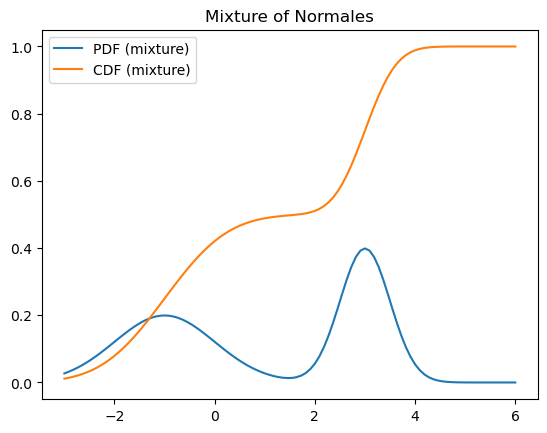

Moments: Expectation = 1.0 , Variance = 4.625


In [15]:
from scipy.stats import norm
from scipy.integrate import quad


mu1, sigma1, weight1 = -1, 1, 0.5
mu2, sigma2, weight2 = 3, 0.5, 0.5

# (PDF)
def mixture_pdf(x):
    return weight1 * norm.pdf(x, mu1, sigma1) + weight2 * norm.pdf(x, mu2, sigma2)

# (CDF->integrating)
from scipy.integrate import quad

def mixture_cdf(x):
    cdf_val, _ = quad(mixture_pdf, -np.inf, x)
    return cdf_val


x = np.linspace(-3, 6, 100)
pdf = mixture_pdf(x)
cdf = [mixture_cdf(xi) for xi in x]

# Graficar PDF y CDF
plt.plot(x, pdf, label="PDF (mixture)")
plt.plot(x, cdf, label="CDF (mixture)")
plt.title("Mixture of Normales")
plt.legend()
plt.show()


mean = weight1 * mu1 + weight2 * mu2
variance = weight1 * (sigma1**2 + mu1**2) + weight2 * (sigma2**2 + mu2**2) - mean**2
print("Moments: Expectation =", mean, ", Variance =", variance)


In general, given distributions with PDFs 𝑓𝑖 and constant (non-random) weights 𝑝𝑖, the PDF of the mixture is:
$
f(x) = \sum_i p_i f_i(x)
$

$
\mu^{(k)} = \mathbb{E}_f[x^k] = \sum_i p_i \mathbb{E}_{f_i}[x^k] = \sum_i p_i \mu^{(k)}_i
$

Para la varianza, esto se expresa como:
$
\text{Var}(f) = \mu^{(2)} - (\mu^{(1)})^2 = \sum_i p_i \mu^{(2)}_i - \left( \sum_i p_i \mu^{(1)}_i \right)^2
$

Usando las varianzas de las componentes \(f_i\), denotadas como \(\sigma_i^2\), sabemos que:
$
\mu^{(2)}_i = \sigma_i^2 + (\mu^{(1)}_i)^2
$

Por lo tanto, la varianza de la mezcla \(f\) se puede escribir como:
$
\text{Var}(f) = \sum_i p_i (\sigma_i^2 + (\mu^{(1)}_i)^2) - \left( \sum_i p_i \mu^{(1)}_i \right)^2
$

O equivalente:
$
\text{Var}(f) = \sum_i p_i \sigma_i^2 + \sum_i p_i (\mu^{(1)}_i)^2 - \left( \sum_i p_i \mu^{(1)}_i \right)^2
$


## Testing that the approximate distribution (e.g. the poisson enough large) is the normal

In [177]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import normal
from numpy.random import poisson
from numpy.random import lognormal
from scipy.stats import kstest

data1 = np.random.binomial(10,0.4,1000)
result = kstest(data1, "norm")

In [178]:
if list(result)[1]*100 < 5:
    print("The null is rejected. The data is not distributed according to the normal")
else:
    print("We cannot reject de null hypothesis. The data is distributed according to the normal")


The null is rejected. The data is not distributed according to the normal


In [193]:
seed(12)

data1 = normal(0,1,1000)
data2 = normal(0,1,1000)

result2 = kstest(data1,"norm")
if list(result2)[1]*100 < 5:
    print(f"The null is rejected. The data is not distributed according to the normal, P-value: {round(list(result2)[1]*100,2)}%")
else:
    print(f"We cannot reject de null hypothesis. The data is distributed according to the normal, P-value: {round(list(result2)[1]*100,2)}%")


We cannot reject de null hypothesis. The data is distributed according to the normal, P-value: 19.61%


In [196]:
data1 = normal(0,1,1000)
data2 = normal(0,1,1000)

result2 = kstest(data1,data2)
if list(result2)[1]*100 < 5:
    print(f"The null is rejected. The data does not come from the same distribution, P-value: {round(list(result2)[1]*100,2)}%")
else:
    print(f"We cannot reject de null hypothesis. The data comes from the same distribution, P-value: {round(list(result2)[1]*100,2)}%")


We cannot reject de null hypothesis. The data comes from the same distribution, P-value: 88.82%


# Jensen's Inequality

In [16]:
import numpy as np

np.random.seed(42)
samples = np.random.uniform(0, 1, 1000)

# convex function: φ(x) = x^2
phi = lambda x: x**2


lhs = phi(np.mean(samples))  # φ(𝔼[X])
rhs = np.mean(phi(samples))  # 𝔼[φ(X)]

print(f"Jensen Inequality: φ(𝔼[X]) = {lhs}, 𝔼[φ(X)] = {rhs}")
print("¿Se cumple la desigualdad de Jensen?", lhs <= rhs)

Jensen Inequality: φ(𝔼[X]) = 0.24035148807333703, 𝔼[φ(X)] = 0.32561038208072784
¿Se cumple la desigualdad de Jensen? True


# Convergence to the normal distribution

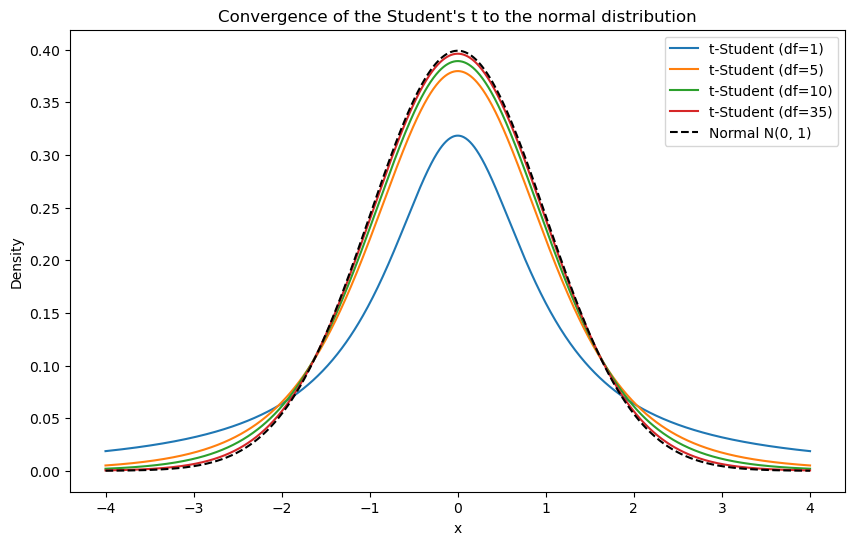

In [17]:
import matplotlib.pyplot as plt
from scipy.stats import t, norm


x = np.linspace(-4, 4, 1000)
dfs = [1, 5, 10, 35]  

plt.figure(figsize=(10, 6))
for df in dfs:
    plt.plot(x, t.pdf(x, df), label=f"t-Student (df={df})")


plt.plot(x, norm.pdf(x, 0, 1), label = "Normal N(0, 1)", linestyle="dashed", color="black")

plt.title("Convergence of the Student's t to the normal distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

# Relationship between t and F

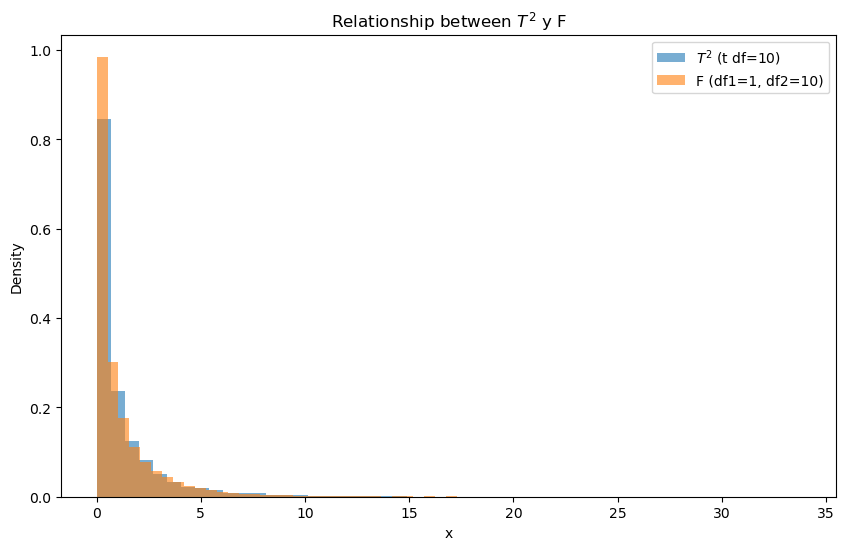

In [18]:
from scipy.stats import f, t

df_t = 10  
df_f1, df_f2 = 1, df_t  


np.random.seed(42)
samples_t = t.rvs(df_t, size=10000)  
samples_f = f.rvs(df_f1, df_f2, size=10000)  

plt.figure(figsize=(10, 6))
plt.hist(samples_t**2, bins=50, alpha=0.6, label=f"$T^2$ (t df={df_t})", density=True)
plt.hist(samples_f, bins=50, alpha=0.6, label=f"F (df1={df_f1}, df2={df_f2})", density=True)

plt.title("Relationship between $T^2$ y F")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

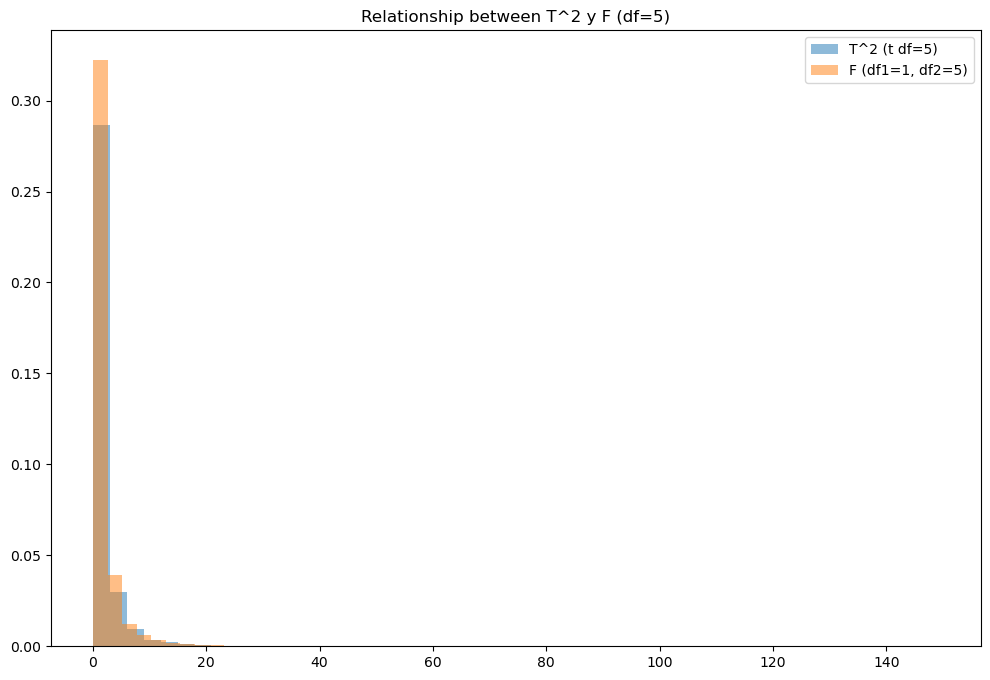

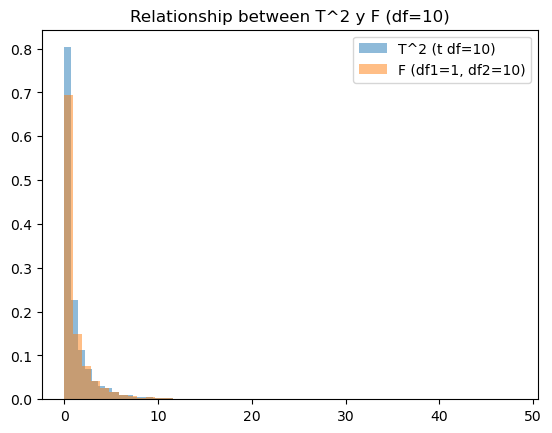

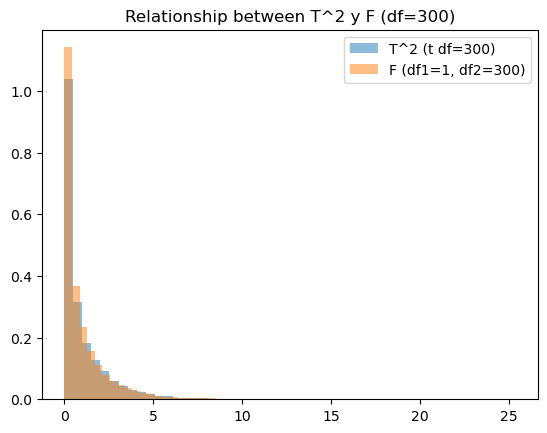

In [19]:
# Cambiar grados de libertad para observar la convergencia
dfs = [5, 10, 300]

plt.figure(figsize=(12, 8))
for df in dfs:
    samples_t = t.rvs(df, size=10000)
    samples_f = f.rvs(1, df, size=10000)
    
    plt.hist(samples_t**2, bins=50, alpha=0.5, density=True, label=f"T^2 (t df={df})")
    plt.hist(samples_f, bins=50, alpha=0.5, density=True, label=f"F (df1=1, df2={df})")
    plt.title(f"Relationship between T^2 y F (df={df})")
    plt.legend()
    plt.show()